# Creating the dirichlet plots for the paper

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import dirichlet
import matplotlib.colors as mcolors

# Matplotlib settings for publication-quality plots
mpl.rcParams.update({
    'font.family': 'serif',
    'font.size': 14,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.dpi': 300,
    'savefig.dpi': 300
})

In [16]:
# Define the cmap_map function and create light_RdBu colormap
def cmap_map(function, cmap):
    """Return a modified version of the given colormap using the provided function.
    The function is applied to the RGBA values.
    """
    colors = cmap(np.linspace(0, 1, 256))
    new_colors = function(colors)
    return mcolors.ListedColormap(new_colors)

# Create your custom colormap (light_RdBu)
light_RdBu = cmap_map(lambda x: x * 0.7 + 0.3, plt.cm.RdBu)

## Discrete plot

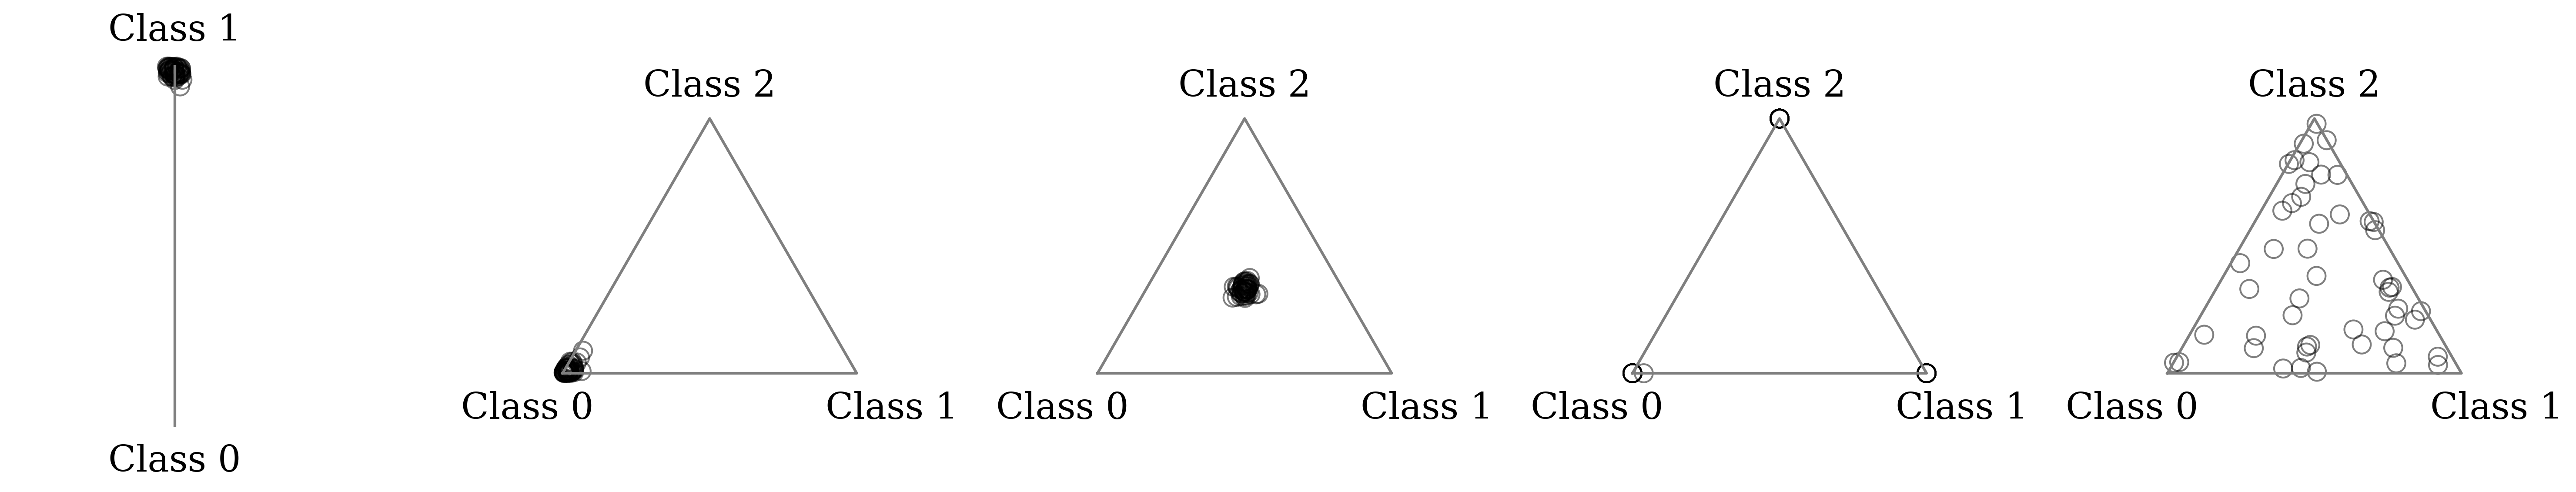

In [36]:
# Create the 5-subplot figure with discrete points
def create_five_subplot_dirichlet_figure(save_path=None):
    """
    Create figure with 5 subplots:
    - 1 binary Dirichlet (discrete)
    - 4 ternary Dirichlet (discrete) with same alphas as continuous version
    """
    
    # Create figure with 5 subplots
    fig, axs = plt.subplots(1, 5, figsize=(20, 4))
    fig.subplots_adjust(wspace=0.3, left=0.02, right=0.98, top=0.9, bottom=0.1)
    
    # Parameters
    n_samples = 50  # n = 50 per subplot as requested
    point_alpha = 0.5  # alpha = 0.5 for edge transparency
    point_size = 100  # Increased size for better visibility with hollow circles
    point_color = 'k'
    
    # Subplot 1: Binary Dirichlet
    alpha_binary = [60, 1]
    ax = axs[0]
    
    # Generate binary samples
    samples = np.random.default_rng(42).dirichlet(alpha_binary, size=n_samples)
    y = samples[:, 0]
    jitter = 0.01
    x = jitter * (np.random.rand(n_samples) - 0.5)
    
    ax.scatter(x, y, s=point_size, edgecolors=point_color, facecolors='none', 
               alpha=point_alpha, rasterized=True)
    ax.plot([0, 0], [0, 1], color='C7', lw=1.5)
    
    # Add class labels for binary (consistent with plot_two_dirichlets)
    ax.text(0, -0.05, 'Class 0', ha="center", va="top", fontsize=20)
    ax.text(0, 1.05, 'Class 1', ha="center", va="bottom", fontsize=20)

    ax.set_xlim(-0.1, 0.1)
    ax.set_ylim(-0.1, 1.1)
    ax.axis("off")

    # Subplots 2-5: Ternary Dirichlet with same alphas as continuous version
    alphas_ternary = [
        [60, 1, 1],      # No aleatoric, no epistemic
        [200, 200, 200],    # Aleatoric only
        [0.002, 0.002, 0.002], # Epistemic only
        [1, 1, 1]  # Both aleatoric & epistemic
    ]
    
    # Use consistent random seed for reproducibility
    rng = np.random.default_rng(42)
    
    for idx, alpha in enumerate(alphas_ternary, start=1):
        ax = axs[idx]
        
        # Generate ternary samples
        samples = rng.dirichlet(alpha, size=n_samples)
        X, Y, Z = samples.T
        
        # Convert to 2D coordinates for plotting
        coords_x = Y + 0.5 * Z
        coords_y = (np.sqrt(3) / 2.0) * Z
        
        # Scatter plot with hollow circles and edge transparency
        ax.scatter(coords_x, coords_y, s=point_size, edgecolors=point_color, 
                  facecolors='none', alpha=point_alpha, rasterized=True)
        
        # Draw triangle
        tri = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0]])
        tx = tri[:, 1] + 0.5 * tri[:, 2]
        ty = (np.sqrt(3) / 2.0) * tri[:, 2]
        ax.plot(tx, ty, color='C7', lw=1.5)
        
        # Add class labels at corners with more space (increased offsets)
        corners = [(0, 0), (1, 0), (0.5, np.sqrt(3)/2)]
        offsets = [(-0.12, -0.12), (0.12, -0.12), (0, 0.11)]  # Increased spacing
        class_labels = ['Class 0', 'Class 1', 'Class 2']
        
        for (cx, cy), (dx, dy), lbl in zip(corners, offsets, class_labels):
            ax.text(cx + dx, cy + dy, lbl, ha='center', va='center', 
                   fontsize=20)
        
        ax.set_aspect('equal')
        ax.axis('off')
    
    plt.tight_layout()
    
    if save_path:
        fig.savefig(save_path, bbox_inches='tight', dpi=300)
    
    plt.show()
    return fig

# Create the figure with 5 discrete subplots
path = "figures/iclr_discrete_dirichlet.pdf" #None
fig = create_five_subplot_dirichlet_figure(save_path=path)

## Same plot as above but have the continues plot underneath

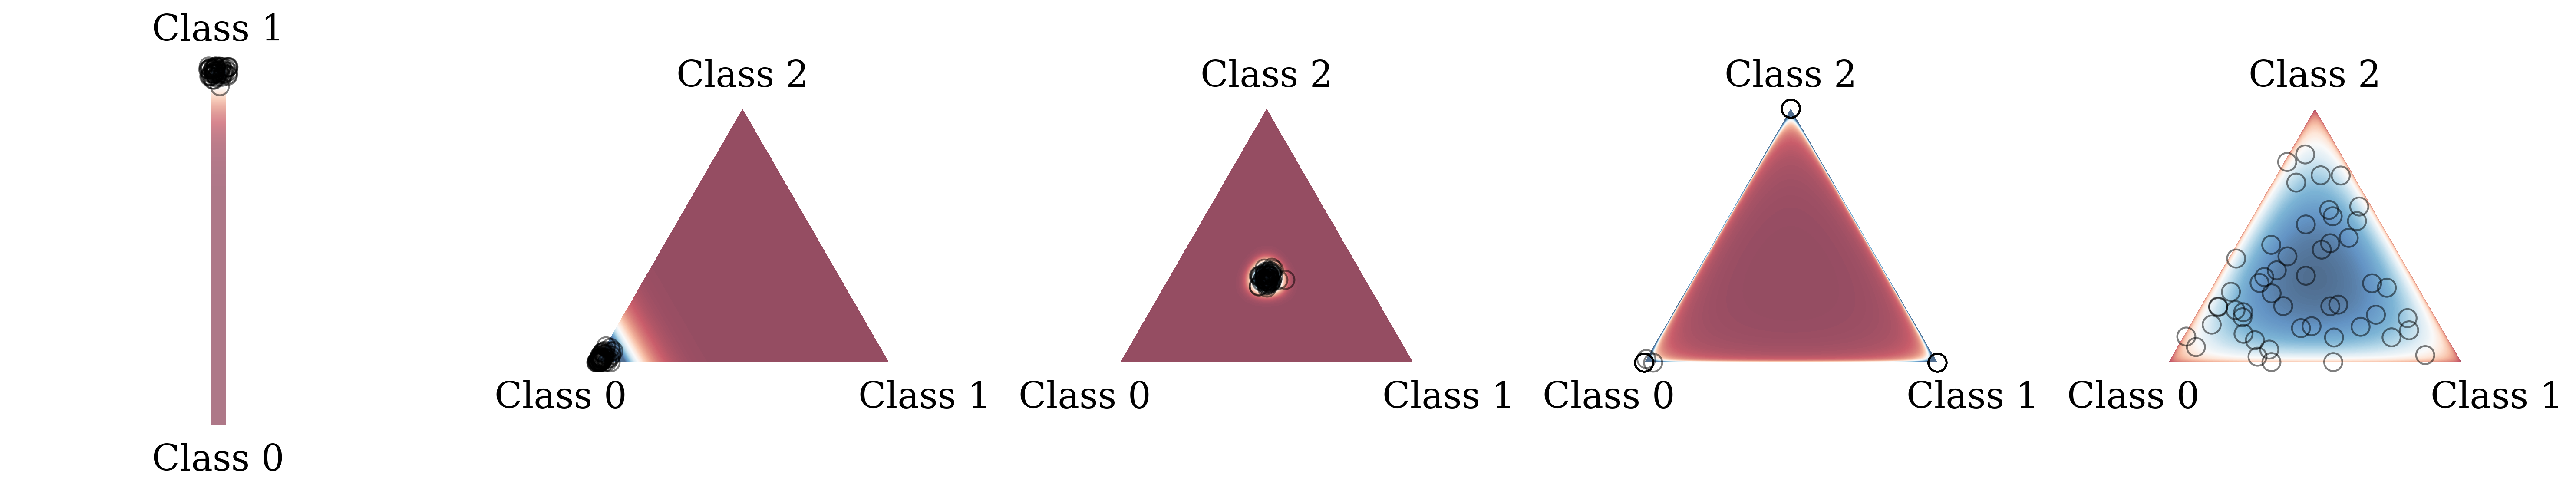

In [38]:
def create_five_subplot_combined_figure(save_path=None):
    """
    Create figure with 5 subplots showing both continuous and discrete:
    - 1 binary Dirichlet (continuous + discrete overlay)
    - 4 ternary Dirichlet (continuous + discrete overlay) with different alphas for continuous vs discrete
    """

    # Create figure with 5 subplots
    fig, axs = plt.subplots(1, 5, figsize=(20, 4))
    fig.subplots_adjust(wspace=0.3, left=0.02, right=0.98, top=0.9, bottom=0.1)

    # Parameters for discrete points
    n_samples = 50  # n = 50 per subplot as requested
    point_alpha = 0.5  # alpha = 0.5 for transparency as requested
    point_size = 100
    point_color = 'k'

    # Use consistent random seed for reproducibility
    rng = np.random.default_rng(42)

    # Subplot 1: Binary Dirichlet (continuous + discrete)
    alpha_binary_discrete = [60, 1]  # For discrete points
    alpha_binary_continuous = [15,1]  # For continuous visualization
    ax = axs[0]

    # First: Plot continuous distribution for binary
    epsilon = 1e-10
    y_vals = np.linspace(epsilon, 1 - epsilon, 1000)

    # Calculate PDF values for binary Dirichlet using the Beta distribution approach
    from scipy.stats import beta
    # Binary Dirichlet is equivalent to Beta distribution
    beta_dist = beta(alpha_binary_continuous[0], alpha_binary_continuous[1])
    pdf_values_binary = beta_dist.pdf(y_vals)
    
    # Cap the highest density values for better visibility (cut off top 5% of values)
    pdf_max_cutoff = np.percentile(pdf_values_binary, 99)
    pdf_values_binary_capped = np.clip(pdf_values_binary, 0, pdf_max_cutoff)
    
    # Normalize for visualization
    pdf_norm = (pdf_values_binary_capped - pdf_values_binary_capped.min()) / (pdf_values_binary_capped.max() - pdf_values_binary_capped.min() + 1e-10)

    # Create color array for gradient effect using light_RdBu
    colors = light_RdBu(pdf_norm)
    
    # Plot as a continuous colored line using LineCollection for efficiency
    from matplotlib.collections import LineCollection
    points = np.array([np.zeros(len(y_vals)), y_vals]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, colors=colors[:-1], linewidth=8, zorder=1)
    ax.add_collection(lc)

    # Second: Add discrete points on top
    samples = rng.dirichlet(alpha_binary_discrete, size=n_samples)
    y = samples[:, 0]
    jitter = 0.01
    x = jitter * (np.random.rand(n_samples) - 0.5)

    ax.scatter(x, y, s=point_size, edgecolors=point_color, facecolors='none', 
               alpha=point_alpha, rasterized=True)

    # Draw the line border (thinner to not obscure the gradient)
    #ax.plot([0, 0], [0, 1], color='grey', lw=0.5, zorder=2)

    # Add class labels for binary
    ax.text(0, -0.05, 'Class 0', ha="center", va="top", fontsize=20)
    ax.text(0, 1.05, 'Class 1', ha="center", va="bottom", fontsize=20)

    ax.set_xlim(-0.1, 0.1)
    ax.set_ylim(-0.1, 1.1)
    ax.axis("off")

    # Subplots 2-5: Ternary Dirichlet (continuous + discrete) with different alphas
    alphas_ternary_discrete = [
        [60, 1, 1],      # No aleatoric, no epistemic
        [200, 200, 200],    # Aleatoric only
        [0.004, 0.004, 0.004], # Epistemic only
        [1, 1, 1]  # Both aleatoric & epistemic
    ]

    # Create slightly larger alphas for continuous distributions
    alphas_ternary_continuous = [
        [15, 1, 1],      # No aleatoric, no epistemic
        [60, 60, 60],    # Aleatoric only
        [0.3, 0.3, 0.3], # Epistemic only
        [1.3, 1.3, 1.3]  # Both aleatoric & epistemic
    ]

    for idx, (alpha_discrete, alpha_continuous) in enumerate(zip(alphas_ternary_discrete, alphas_ternary_continuous), start=1):
        ax = axs[idx]

        # First: Plot continuous distribution using tricontourf approach
        # Create grid points for x and y in the simplex domain
        x = np.linspace(0.001, 0.999, 300)
        y = np.linspace(0.001, 0.999, 300)
        X, Y = np.meshgrid(x, y)

        # Keep only the points that lie within the simplex (X + Y < 1)
        mask = (X + Y) < 0.999
        X_flat = X[mask]
        Y_flat = Y[mask]
        Z_flat = 1.0 - X_flat - Y_flat

        # Stack to create points array - shape (3, N) as expected by dirichlet.pdf
        points = np.stack([X_flat, Y_flat, Z_flat])  # Shape: (3, N)

        # Convert the 3D points to 2D coordinates for plotting on an equilateral triangle
        coords_2d_x = Y_flat + 0.5 * Z_flat
        coords_2d_y = (np.sqrt(3) / 2) * Z_flat

        # Compute the Dirichlet PDF values at the given points using CONTINUOUS alphas
        pdf_values = dirichlet.pdf(points, alpha_continuous)
        
        # Cap the highest density values for better visibility (cut off top 10% of values)
        pdf_max_cutoff = np.percentile(pdf_values, 99)
        pdf_values_capped = np.clip(pdf_values, 0, pdf_max_cutoff)

        # Create contour plot on the simplex with capped values using light_RdBu
        contour = ax.tricontourf(coords_2d_x, coords_2d_y, pdf_values_capped,
                                levels=200, cmap=light_RdBu, alpha=1, zorder=1)

        # Second: Add discrete points on top using DISCRETE alphas
        samples = rng.dirichlet(alpha_discrete, size=n_samples)
        X_d, Y_d, Z_d = samples.T

        # Convert to 2D coordinates for plotting
        coords_x_d = Y_d + 0.5 * Z_d
        coords_y_d = (np.sqrt(3) / 2.0) * Z_d

        # Scatter plot with specified alpha for transparency, on top with zorder
        ax.scatter(coords_x_d, coords_y_d, s=point_size, edgecolors=point_color, 
                  facecolors='none', alpha=point_alpha, rasterized=True)

        # Draw triangle border
        tri = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0]])
        tx = tri[:, 1] + 0.5 * tri[:, 2]
        ty = (np.sqrt(3) / 2.0) * tri[:, 2]
        #ax.plot(tx, ty, color='grey', lw=1.5, zorder=11)

        # Add class labels at corners
        corners = [(0, 0), (1, 0), (0.5, np.sqrt(3)/2)]
        offsets = [(-0.12, -0.12), (0.12, -0.12), (0, 0.11)]
        class_labels = ['Class 0', 'Class 1', 'Class 2']

        for (cx, cy), (dx, dy), lbl in zip(corners, offsets, class_labels):
            ax.text(cx + dx, cy + dy, lbl, ha='center', va='center',
                    fontsize=20, zorder=12)

        ax.set_aspect('equal')
        ax.axis('off')
        # Set limits to avoid extra space
        ax.set_xlim(-0.2, 1.2)
        ax.set_ylim(-0.2, 1.0)

    plt.tight_layout()

    if save_path:
        fig.savefig(save_path, bbox_inches='tight', dpi=300)

    plt.show()
    return fig

path = "figures/iclr_continues_dirichlet.png" #None
fig = create_five_subplot_combined_figure(save_path=path)